In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.python.keras import backend as K

In [3]:
from sklearn.preprocessing import StandardScaler

In [74]:
df = pd.read_csv('F:\my project\dataset\learning_dataset\\auto-mpg.data-original', sep=" ", skipinitialspace=True,
                 na_values='?', comment='\t', header=0)
df

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,NaN
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,NaN
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,NaN
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,NaN
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,NaN
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,NaN
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,NaN
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,NaN


In [75]:
df.drop('carname', axis=1, inplace=True)

In [76]:
df

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [77]:
df.isna().sum()

mpg             8
cylinder        0
displacement    0
horsepower      6
weight          0
acceleration    0
modelyear       0
origin          0
dtype: int64

In [78]:
df2 = df.dropna()
df2

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [79]:
origin = df2.pop('origin')

In [80]:
df2['europe'] = (origin == 1) * 1
df2['usa'] = (origin == 2) * 1
df2['japan'] = (origin == 3) * 1
df2

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21280\3543147034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['europe'] = (origin == 1) * 1
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21280\3543147034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['usa'] = (origin == 2) * 1
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21280\3543147034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelyear,europe,usa,japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1,0,0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,0,1,0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1,0,0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1,0,0


In [81]:
x = df2.drop('mpg', axis=1).values
y = df2.mpg.values

In [82]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2,shuffle=True)

In [83]:
y_tr

array([22. , 15. , 25. , 18.5, 33.8, 43.4, 36.4, 20.5, 16. , 21. , 14. ,
       24. , 21. , 35. , 23.7, 24. , 13. , 17. , 15.5, 16. , 13. , 18. ,
       13. , 19. , 32.4, 29. , 34.4, 25.5, 29.5, 36.1, 33. , 18. , 32. ,
       38. , 26. , 29.8, 25. , 16. , 32.3, 24. , 31. , 23. , 19. , 21.1,
       20. , 16. , 19. , 25. , 32.8, 34.7, 19. , 14. , 34.5, 14.5, 14. ,
       19.2, 30. , 29. , 18. , 29. , 26. , 38. , 20.2, 26. , 12. , 33.5,
       27.2, 18.6, 34.2, 32. , 17.5, 22. , 21.5, 18. , 25.4, 15. , 18. ,
       33.7, 30. , 17.6, 28.1, 17. , 39. , 31.6, 37. , 31. , 24.3, 10. ,
       24. , 22.3, 26.6, 37. , 30.9, 21.5, 29. , 12. , 17.5, 18.1, 32.4,
       15. , 23. , 37.3, 15. , 29. , 17. , 20.3, 28. , 25.8, 14. , 16.5,
       14. , 29. , 25. , 21. , 20. , 19.9, 31. , 13. , 19. , 13. , 23.9,
       25.5, 32. , 15.5, 13. , 18. , 33. , 14. , 14. , 27. , 24. , 24. ,
       24. , 29.8, 36.1, 40.8, 15. , 23.8, 24. , 27. , 18. , 35.7, 15. ,
       14. , 22.5, 27. , 19. , 38. , 17.6, 15.5, 44

In [84]:
stat=pd.DataFrame(x_tr,columns=df2.columns.drop('mpg')).describe()
stat

,cylinder,displacement,horsepower,weight,acceleration,modelyear,europe,usa,japan
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,5.408946,189.942492,103.191693,2930.230032,15.523003,76.102236,0.616613,0.175719,0.207668
std,1.699976,103.159867,38.149776,826.293565,2.804137,3.748815,0.486990,0.381190,0.406287
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,101.000000,75.000000,2215.000000,13.500000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,141.000000,90.000000,2725.000000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,8.000000,260.000000,122.000000,3530.000000,17.000000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [85]:
stat=stat.transpose()
stat

,count,mean,std,min,25%,50%,75%,max
cylinder,313.0,5.408946,1.699976,3.0,4.0,4.0,8.0,8.0
displacement,313.0,189.942492,103.159867,68.0,101.0,141.0,260.0,455.0
horsepower,313.0,103.191693,38.149776,46.0,75.0,90.0,122.0,230.0
weight,313.0,2930.230032,826.293565,1613.0,2215.0,2725.0,3530.0,4997.0
acceleration,313.0,15.523003,2.804137,8.0,13.5,15.5,17.0,24.8
modelyear,313.0,76.102236,3.748815,70.0,73.0,76.0,79.0,82.0
europe,313.0,0.616613,0.486990,0.0,0.0,1.0,1.0,1.0
usa,313.0,0.175719,0.381190,0.0,0.0,0.0,0.0,1.0
japan,313.0,0.207668,0.406287,0.0,0.0,0.0,0.0,1.0


In [86]:
stat['mean']

cylinder           5.408946
displacement     189.942492
horsepower       103.191693
weight          2930.230032
acceleration      15.523003
modelyear         76.102236
europe             0.616613
usa                0.175719
japan              0.207668
Name: mean, dtype: float64

In [87]:
from sklearn.preprocessing import normalize

In [88]:
x_tr

array([[  6., 198.,  95., ...,   1.,   0.,   0.],
       [  8., 304., 150., ...,   1.,   0.,   0.],
       [  4., 110.,  87., ...,   0.,   1.,   0.],
       ...,
       [  4., 116.,  90., ...,   0.,   1.,   0.],
       [  6., 225., 100., ...,   1.,   0.,   0.],
       [  4.,  81.,  60., ...,   0.,   0.,   1.]])

In [89]:
x_tr[:,0]

array([6., 8., 4., 8., 4., 4., 5., 6., 8., 6., 8., 4., 6., 4., 3., 4., 8.,
       8., 8., 8., 8., 6., 8., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 6.,
       4., 4., 4., 8., 4., 4., 4., 4., 6., 4., 4., 6., 3., 4., 4., 4., 6.,
       8., 4., 8., 8., 6., 4., 4., 8., 4., 4., 4., 6., 4., 8., 4., 4., 6.,
       4., 4., 6., 4., 6., 6., 6., 6., 6., 4., 4., 8., 4., 6., 4., 4., 4.,
       4., 4., 8., 4., 4., 8., 4., 4., 3., 4., 8., 8., 8., 4., 8., 6., 4.,
       8., 4., 6., 5., 4., 4., 8., 6., 8., 4., 4., 4., 6., 8., 4., 8., 6.,
       8., 4., 4., 4., 8., 8., 6., 4., 8., 8., 4., 4., 4., 6., 4., 4., 4.,
       8., 4., 4., 4., 6., 4., 8., 8., 6., 4., 6., 4., 6., 8., 4., 6., 4.,
       8., 4., 4., 6., 4., 4., 4., 6., 4., 4., 4., 8., 6., 6., 4., 4., 6.,
       6., 4., 4., 4., 4., 6., 4., 8., 4., 8., 4., 6., 8., 4., 4., 6., 6.,
       6., 8., 6., 8., 4., 4., 8., 8., 4., 4., 4., 8., 4., 4., 8., 4., 4.,
       8., 4., 8., 6., 8., 4., 4., 8., 8., 8., 4., 6., 8., 8., 6., 8., 8.,
       8., 4., 8., 4., 6.

In [90]:
#normalize(x_tr,axis=1)

In [91]:
x_tr.shape

(313, 9)

In [92]:
for i in range(x_tr.shape[1]):
    col=x_tr[:,i]
    x_tr[:,i]=(col-np.mean(col))/np.std(col)

In [93]:
x_tr

array([[ 0.34824058,  0.07823207, -0.21506838, ...,  0.78851865,
        -0.46171235, -0.51195388],
       [ 1.52661139,  1.10740881,  1.22892621, ...,  0.78851865,
        -0.46171235, -0.51195388],
       [-0.83013024, -0.7761788 , -0.42510395, ..., -1.26820083,
         2.16585066, -0.51195388],
       ...,
       [-0.83013024, -0.71792352, -0.34634061, ..., -1.26820083,
         2.16585066, -0.51195388],
       [ 0.34824058,  0.34038087, -0.08379614, ...,  0.78851865,
        -0.46171235, -0.51195388],
       [-0.83013024, -1.05774603, -1.13397402, ..., -1.26820083,
        -0.46171235,  1.95330095]])

In [94]:
x_ts

array([[4.000e+00, 1.200e+02, 9.700e+01, 2.506e+03, 1.450e+01, 7.200e+01,
        0.000e+00, 0.000e+00, 1.000e+00],
       [8.000e+00, 4.550e+02, 2.250e+02, 4.951e+03, 1.100e+01, 7.300e+01,
        1.000e+00, 0.000e+00, 0.000e+00],
       [8.000e+00, 3.500e+02, 1.800e+02, 4.380e+03, 1.210e+01, 7.600e+01,
        1.000e+00, 0.000e+00, 0.000e+00],
       [8.000e+00, 4.000e+02, 1.750e+02, 5.140e+03, 1.200e+01, 7.100e+01,
        1.000e+00, 0.000e+00, 0.000e+00],
       [4.000e+00, 9.700e+01, 7.800e+01, 1.940e+03, 1.450e+01, 7.700e+01,
        0.000e+00, 1.000e+00, 0.000e+00],
       [6.000e+00, 2.580e+02, 9.500e+01, 3.193e+03, 1.780e+01, 7.600e+01,
        1.000e+00, 0.000e+00, 0.000e+00],
       [6.000e+00, 2.500e+02, 7.800e+01, 3.574e+03, 2.100e+01, 7.600e+01,
        1.000e+00, 0.000e+00, 0.000e+00],
       [4.000e+00, 1.080e+02, 9.400e+01, 2.379e+03, 1.650e+01, 7.300e+01,
        0.000e+00, 0.000e+00, 1.000e+00],
       [6.000e+00, 2.310e+02, 1.100e+02, 3.415e+03, 1.580e+01, 8.100e+01

In [95]:
for i in range(x_ts.shape[1]):
    col=x_ts[:,i]
    x_ts[:,i]=(col-np.mean(col))/np.std(col)

In [96]:
x_ts

array([[-1.0092087 , -0.84891167, -0.31801639, -0.72342347, -0.4332643 ,
        -1.03637898, -1.38777733, -0.44381268,  2.15472902],
       [ 1.3357174 ,  2.23819891,  2.93024802,  1.95977372, -1.79460042,
        -0.73973427,  0.72057669, -0.44381268, -0.46409548],
       [ 1.3357174 ,  1.27059709,  1.78828007,  1.33314566, -1.36675192,
         0.15019985,  0.72057669, -0.44381268, -0.46409548],
       [ 1.3357174 ,  1.73135986,  1.66139474,  2.1671865 , -1.40564724,
        -1.33302368,  0.72057669, -0.44381268, -0.46409548],
       [-1.0092087 , -1.06086254, -0.80018064, -1.34456441, -0.4332643 ,
         0.44684456, -1.38777733,  2.25320285, -0.46409548],
       [ 0.16325435,  0.42279359, -0.36877053,  0.03050556,  0.85028118,
         0.15019985,  0.72057669, -0.44381268, -0.46409548],
       [ 0.16325435,  0.34907154, -0.80018064,  0.4486234 ,  2.09493135,
         0.15019985,  0.72057669, -0.44381268, -0.46409548],
       [-1.0092087 , -0.95949473, -0.39414759, -0.86279608,  0

In [97]:
import tensorflow as tf
import keras

In [98]:
model=tf.keras.models.Sequential([Dense(64,activation='relu',input_shape=[len(x_tr)]),Dense(64,activation=tf.nn.relu),Dense(1)])

In [99]:
opt=tf.keras.optimizers.RMSprop(0.001)
opt

In [100]:
model.compile(loss='mean_squared_error',optimizer=opt,metrics=['mean_absolute_error'])
model.fit(x_tr,y_tr,batch_size=10,epochs=1000)

Epoch 1/1000
32/32 [==============================] - 1s 3ms/step - loss: 533.5837 - mean_absolute_error: 21.5421
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: 330.1638 - mean_absolute_error: 16.1422
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 129.8299 - mean_absolute_error: 9.5266
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 36.8864 - mean_absolute_error: 4.8720
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 19.3380 - mean_absolute_error: 3.4167
Epoch 6/1000
32/32 [==============================] - 0s 4ms/step - loss: 13.6858 - mean_absolute_error: 2.8110
Epoch 7/1000
32/32 [==============================] - 0s 3ms/step - loss: 11.8711 - mean_absolute_error: 2.5808
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 10.5419 - mean_absolute_error: 2.4027
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 9.8821 - mean_absolute_er

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_3 (ModuleWra  (None, 64)               640       
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 64)               4160      
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 1)                65        
 pper)                                                           
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [102]:
pr=model.predict(x_ts)
pr

3/3 [==============================] - 0s 8ms/step


array([[26.773512 ],
       [14.210266 ],
       [13.889122 ],
       [12.532927 ],
       [32.02683  ],
       [23.691143 ],
       [17.765291 ],
       [29.656279 ],
       [20.695646 ],
       [30.956665 ],
       [13.404974 ],
       [33.258026 ],
       [13.900889 ],
       [20.960278 ],
       [19.418493 ],
       [27.611238 ],
       [22.47819  ],
       [14.816645 ],
       [27.490843 ],
       [36.171925 ],
       [20.546167 ],
       [23.133734 ],
       [33.191654 ],
       [23.832766 ],
       [14.228669 ],
       [18.68909  ],
       [29.010744 ],
       [38.99455  ],
       [18.513266 ],
       [29.512598 ],
       [23.483473 ],
       [17.037725 ],
       [27.966722 ],
       [14.823277 ],
       [36.710484 ],
       [32.945152 ],
       [38.7635   ],
       [31.9552   ],
       [20.921597 ],
       [27.689917 ],
       [18.388578 ],
       [16.18323  ],
       [29.117464 ],
       [21.409365 ],
       [12.822867 ],
       [29.698992 ],
       [17.94795  ],
       [16.59

In [103]:
y_ts

array([23. , 12. , 16.5, 13. , 29. , 17.5, 18. , 22. , 22.4, 27. , 13. ,
       30.5, 14. , 16. , 20.6, 18. , 18. , 15. , 23. , 28. , 20.2, 20.2,
       30.5, 18. , 14. , 15.5, 20. , 34.1, 16.9, 27.2, 23. , 16. , 20. ,
       14. , 31.3, 24. , 36. , 21.6, 19.4, 27. , 16. , 13. , 28.4, 18.1,
       13. , 25. , 17.5, 14. , 18.5, 18. , 31. , 19. , 34.1,  9. , 13. ,
       31.5, 25. , 24. , 22. , 13. , 24.2, 44. , 20.2, 31.5, 20.5, 24.5,
       26. , 12. , 22. , 29.9, 38. , 32. , 23. , 15. , 15. , 20. , 12. ,
       28. , 14. ])

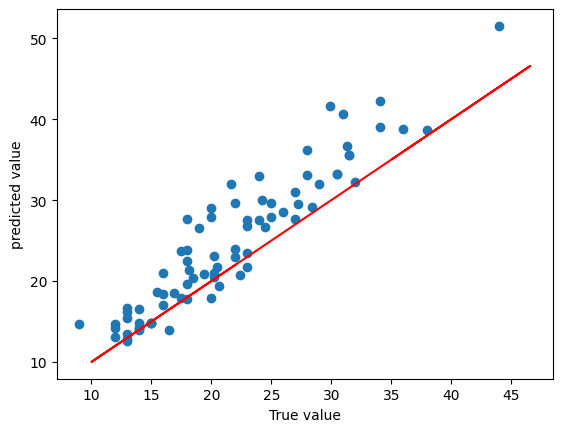

In [104]:
plt.scatter(y_ts,pr)
plt.xlabel('True value')
plt.ylabel('predicted value')
plt.plot(y_tr,y_tr,c='red')

In [105]:
house_df=pd.read_csv('F:\my project\dataset\learning_dataset\\HousingData.csv')
house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [106]:
house_df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [107]:
house_df=house_df.dropna()

In [108]:
x2=house_df.drop('MEDV',axis=1).values
y2=house_df.MEDV.values

In [109]:
x2

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [4.5270e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        9.0800e+00],
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00]])

In [110]:
x_c=x2.copy()
y_c=y2.copy()

In [111]:
x2.shape[1]

13

In [112]:
type(x2[0,1])

numpy.float64

In [113]:
for i in range(x2.shape[1]):
    col=x2[:,i]
    print(np.mean(col))
    print(np.std(col))
    x2[:,i]=(col-np.mean(col))/np.std(col)

3.6901361675126916
9.190736959443624
11.460659898477157
23.923664570213468
11.000862944162437
6.8995910837779135
0.06852791878172589
0.2526496450208689
0.5532154822335025
0.11296886026574787
6.280015228426396
0.6970985515915517
68.93274111675127
27.853290760552206
3.8052680203045686
2.0959063115135357
9.403553299492385
8.622487867125866
406.43147208121826
168.09868875690958
18.53756345177665
2.163708546077731
358.4909390862944
89.16991926033559
12.769111675126906
7.299149903406681


In [114]:
x2

array([[-0.40081837,  0.27334191, -1.25962   , ..., -1.49630294,
         0.43074011, -1.06712587],
       [-0.39853454, -0.47905119, -0.56972405, ..., -0.3408793 ,
         0.43074011, -0.49719648],
       [-0.39853672, -0.47905119, -0.56972405, ..., -0.3408793 ,
         0.38509692, -1.19727801],
       ...,
       [-0.3965804 , -0.47905119,  0.13466553, ...,  1.13806296,
         0.43074011, -0.50541662],
       [-0.39489501, -0.47905119,  0.13466553, ...,  1.13806296,
         0.43074011, -0.97670438],
       [-0.38958205, -0.47905119,  0.13466553, ...,  1.13806296,
         0.39204993, -0.86162248]])

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,shuffle=True)

In [118]:
h_model=tf.keras.models.Sequential()
h_model.add(Dense(14,activation='relu',input_dim=x_train.shape[1]))
h_model.add(Dense(100,activation='relu'))
h_model.add(Dense(1))

In [122]:
h_model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.RMSprop(0.001),metrics=['mean_squared_error'])

In [123]:
h_model.fit(x_train,y_train,batch_size=30,epochs=1000)

Epoch 1/1000
11/11 [==============================] - 1s 3ms/step - loss: 558.9435 - mean_squared_error: 558.9435
Epoch 2/1000
11/11 [==============================] - 0s 3ms/step - loss: 516.2941 - mean_squared_error: 516.2941
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 472.1729 - mean_squared_error: 472.1729
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 422.9102 - mean_squared_error: 422.9102
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 369.2113 - mean_squared_error: 369.2113
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step - loss: 312.9950 - mean_squared_error: 312.9950
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step - loss: 255.2924 - mean_squared_error: 255.2924
Epoch 8/1000
11/11 [==============================] - 0s 3ms/step - loss: 201.9135 - mean_squared_error: 201.9135
Epoch 9/1000
11/11 [==============================] - 0s 2ms/step - loss: 157.1907 - mea

In [124]:
pr_h=h_model.predict(x_test)

3/3 [==============================] - 0s 8ms/step


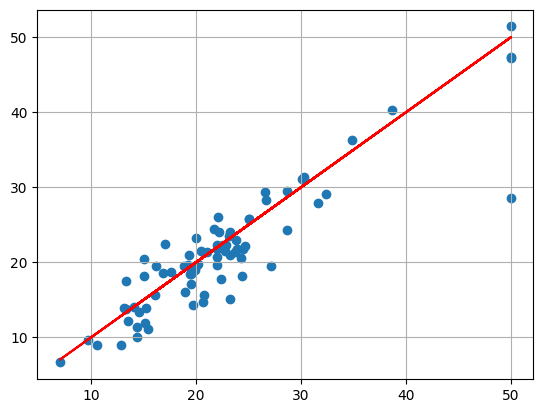

In [126]:
plt.scatter(y_test,pr_h)
plt.plot(y_test,y_test,c='red')
plt.grid()